In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Load Dataset using pd.read_csv

In [225]:
df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


### Cleaning Dataset (Missing Value)

In [226]:
df.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [227]:
df.dtypes

population         float64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                float64
BMI_female         float64
life               float64
child_mortality    float64
Region              object
dtype: object

In [228]:
df.Region.value_counts()

Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                     7
Name: Region, dtype: int64

### Converting Categorical columns to Numerical Columns

In [229]:
dummy = pd.get_dummies(df['Region'])

In [230]:
df= pd.concat([df,dummy], axis=1)

In [231]:
df = df.drop(['Region'],1)

In [232]:
df.dtypes

population                    float64
fertility                     float64
HIV                           float64
CO2                           float64
BMI_male                      float64
GDP                           float64
BMI_female                    float64
life                          float64
child_mortality               float64
America                         uint8
East Asia & Pacific             uint8
Europe & Central Asia           uint8
Middle East & North Africa      uint8
South Asia                      uint8
Sub-Saharan Africa              uint8
dtype: object

### Normalizing data using MinMaxScalar

In [233]:
from sklearn.preprocessing import MinMaxScaler

In [234]:
col_list = list(df)
col_list

['population',
 'fertility',
 'HIV',
 'CO2',
 'BMI_male',
 'GDP',
 'BMI_female',
 'life',
 'child_mortality',
 'America',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'South Asia',
 'Sub-Saharan Africa']

In [235]:
scalar = MinMaxScaler()
new_df = scalar.fit_transform(df)

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [236]:
gapminder = pd.DataFrame(new_df)
gapminder.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.028855,0.229794,0.001548,0.068188,0.520969,0.093443,0.691602,0.804813,0.141574,0.0,0.0,0.0,1.0,0.0,0.0
1,0.016348,0.816165,0.075077,0.030101,0.229964,0.051917,0.703734,0.350267,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
2,0.033510,0.152139,0.017028,0.098094,0.881472,0.112027,0.083681,0.810160,0.067089,1.0,0.0,0.0,0.0,0.0,0.0
3,0.002254,0.019017,0.001548,0.036873,0.615170,0.054149,0.852002,0.729947,0.091389,0.0,0.0,1.0,0.0,0.0,0.0
4,0.017625,0.107765,0.001548,0.369818,0.889169,0.324525,0.000000,0.970588,0.013207,0.0,1.0,0.0,0.0,0.0,0.0


In [237]:
gapminder.columns = col_list

In [238]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,America,East Asia & Pacific,Europe & Central Asia,Middle East & North Africa,South Asia,Sub-Saharan Africa
0,0.028855,0.229794,0.001548,0.068188,0.520969,0.093443,0.691602,0.804813,0.141574,0.0,0.0,0.0,1.0,0.0,0.0
1,0.016348,0.816165,0.075077,0.030101,0.229964,0.051917,0.703734,0.350267,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
2,0.033510,0.152139,0.017028,0.098094,0.881472,0.112027,0.083681,0.810160,0.067089,1.0,0.0,0.0,0.0,0.0,0.0
3,0.002254,0.019017,0.001548,0.036873,0.615170,0.054149,0.852002,0.729947,0.091389,0.0,0.0,1.0,0.0,0.0,0.0
4,0.017625,0.107765,0.001548,0.369818,0.889169,0.324525,0.000000,0.970588,0.013207,0.0,1.0,0.0,0.0,0.0,0.0


# KNN Regression

### Defining Training and Test set and splitting using tts

In [239]:
x = gapminder.drop(['life'],1)
y = gapminder['life']

In [327]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=0)

In [328]:
r2_list = []

for K in range(3,12):
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    r2_list.append(r2)
r2_list

[0.7497827759739544,
 0.741463011741442,
 0.7560599395452439,
 0.754958706107995,
 0.7293154228842038,
 0.7184920365217498,
 0.7011820321818671,
 0.6966838166757309,
 0.7024591628742447]

In [329]:
y_pred

array([0.62177929, 0.76786582, 0.25644142, 0.74769081, 0.41030627,
       0.72678658, 0.77442878, 0.5714633 , 0.83373845, 0.93874575,
       0.78050559, 0.94020418, 0.35780263, 0.35780263, 0.77904716,
       0.71730676, 0.82912008, 0.38721439, 0.81550802, 0.78974234,
       0.94506563, 0.39402042, 0.82668935, 0.412737  , 0.7989791 ,
       0.77783179, 0.74769081, 0.74210015, 0.71682061, 0.41808459,
       0.81672338, 0.2610598 , 0.41030627, 0.8218279 , 0.74769081,
       0.4197861 , 0.77783179, 0.39572193, 0.93461351, 0.74501702,
       0.77151191, 0.412737  ])

Text(0.5, 1.0, 'Predict R-Squared value based on K')

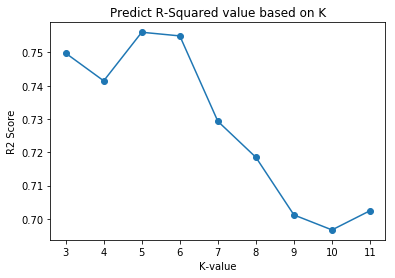

In [330]:
plt.plot(range(3,12),r2_list,marker = 'o')
plt.xlabel('K-value')
plt.ylabel('R2 Score')
plt.title('Predict R-Squared value based on K')

##### Accuracy of the Model === 75.6%

# KNN Classfication

In [244]:
data = pd.read_csv('gapminder.csv')

In [245]:
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


### Converting Categorical columns into numerical columns

In [246]:
data['Region'] = (data['Region'].astype('category')).cat.codes
data

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.10,3.328945,24.59620,12314.0,129.9049,75.3,29.5,3
1,19842251.0,6.43,2.00,1.474353,22.25083,7103.0,130.1247,58.3,192.0,5
2,40381860.0,2.24,0.50,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0
3,2975029.0,1.40,0.10,1.804106,25.35542,7383.0,132.8108,72.5,20.0,2
4,21370348.0,1.96,0.10,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1
5,8331465.0,1.41,0.30,8.183160,26.46741,43952.0,124.1394,80.4,4.6,2
6,8868713.0,1.99,0.10,5.109538,25.65117,14365.0,128.6024,70.6,43.3,2
7,348587.0,1.89,3.10,3.131921,27.24594,24373.0,124.3862,72.2,14.5,0
8,148252473.0,2.38,0.06,0.319161,20.39742,2265.0,125.0307,68.4,55.9,4
9,277315.0,1.83,1.30,6.008279,26.38439,16075.0,126.3940,75.3,15.4,0


In [252]:
data.dtypes

population         float64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                float64
BMI_female         float64
life               float64
child_mortality    float64
Region                int8
dtype: object

In [255]:
data['Region'].value_counts()

2    41
5    40
0    27
1    14
3    10
4     7
Name: Region, dtype: int64

### Defining Training and Test set and splitting using tts

In [257]:
x_cl = data.drop(['Region'],1)
y_cl = data['Region']

In [259]:
x_cl_train, x_cl_test, y_cl_train, y_cl_test = tts(x_cl, y_cl, test_size = 0.3, random_state = 42)

In [260]:
from sklearn.preprocessing import StandardScaler

### Normalizing Dataset using StandardScaler

In [261]:
ss = StandardScaler()

In [262]:
x_cl_train = ss.fit_transform(x_cl_train)
x_cl_test = ss.transform(x_cl_test)

In [288]:
accuracy = []
for K in range(3,12):
    knn_cl = KNeighborsClassifier(n_neighbors=K)
    knn_cl.fit(x_cl_train,y_cl_train)
    accuracy.append(knn_cl.score(x_cl_test,y_cl_test))
accuracy

[0.7142857142857143,
 0.7142857142857143,
 0.7380952380952381,
 0.7619047619047619,
 0.7380952380952381,
 0.7380952380952381,
 0.7619047619047619,
 0.7619047619047619,
 0.7619047619047619]

Text(0.5, 1.0, 'Accuracy of the Model with different value of K')

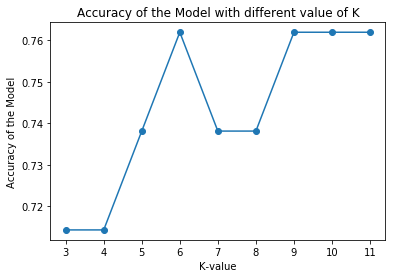

In [289]:
plt.plot(range(3,12),accuracy,marker = 'o')
plt.xlabel('K-value')
plt.ylabel('Accuracy of the Model')
plt.title('Accuracy of the Model with different value of K')

##### Accuracy of the Model === 76.2%

# Multiple Linear Regression

### Assumption of Linear Regression

1) Relation between Input variable(Independent Variable) and Output variable(Dependent variable) should be Linear.

2) There should be No or little Multicollinearity between the features 
   Means two Input variables should not be highly correlated.
    
3) Model should have Homoscedasticity
   Means error term(Residual) should not be vary with respect to predictor variable.

4) Residuals should follow Normal Distribution pattern

5) Little or No autocorrelation in the residuals.
   Menas no correlation should be present amongs residuals
    


In [292]:
data

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.10,3.328945,24.59620,12314.0,129.9049,75.3,29.5,3
1,19842251.0,6.43,2.00,1.474353,22.25083,7103.0,130.1247,58.3,192.0,5
2,40381860.0,2.24,0.50,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0
3,2975029.0,1.40,0.10,1.804106,25.35542,7383.0,132.8108,72.5,20.0,2
4,21370348.0,1.96,0.10,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1
5,8331465.0,1.41,0.30,8.183160,26.46741,43952.0,124.1394,80.4,4.6,2
6,8868713.0,1.99,0.10,5.109538,25.65117,14365.0,128.6024,70.6,43.3,2
7,348587.0,1.89,3.10,3.131921,27.24594,24373.0,124.3862,72.2,14.5,0
8,148252473.0,2.38,0.06,0.319161,20.39742,2265.0,125.0307,68.4,55.9,4
9,277315.0,1.83,1.30,6.008279,26.38439,16075.0,126.3940,75.3,15.4,0


## Features selection using Pearson Correlation HeatMap

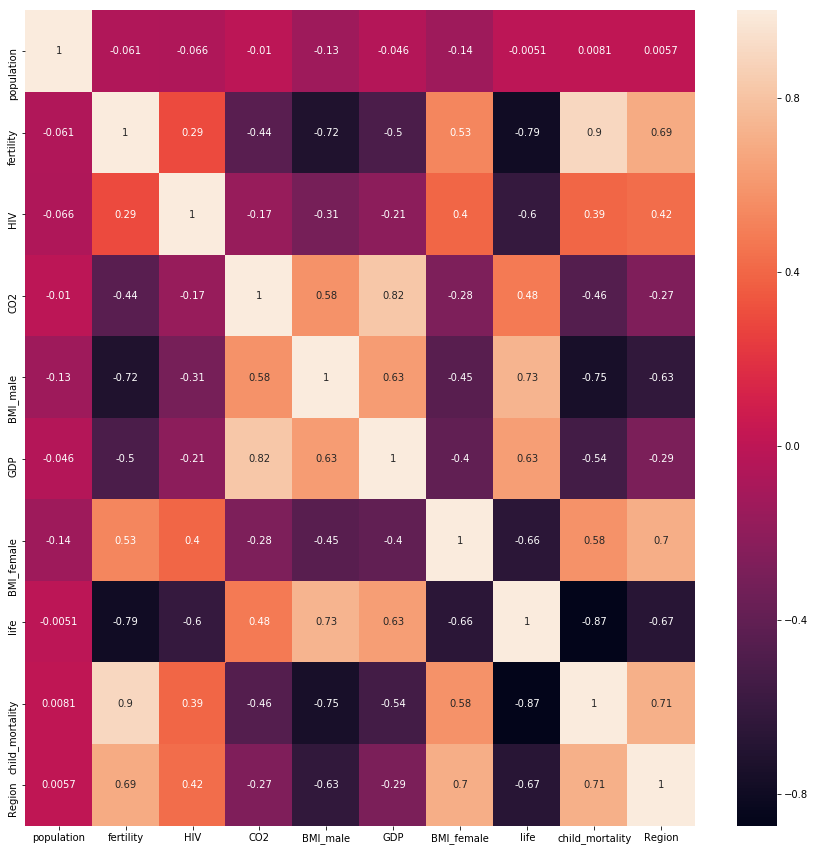

In [295]:
plt.figure(figsize=(15,15))
corr = data.corr()
sns.heatmap(corr,annot=True)

In [300]:
corr_target = abs(corr['life'])
relevent_features = corr_target[corr_target > 0.6]
relevent_features

fertility          0.786921
HIV                0.604749
BMI_male           0.731559
GDP                0.628999
BMI_female         0.658718
life               1.000000
child_mortality    0.874106
Region             0.671386
Name: life, dtype: float64

### Found correlation between two input variables and selected relevent features:
HIV,GDP,Child_mortality

In [312]:
gapminder_lin_corr = data[['HIV','GDP','child_mortality','life']]

In [313]:
columns_list= list(gapminder_lin_corr)

### Normalization using MinMaxScalar

In [315]:
c_linear_df = scalar.fit_transform(gapminder_lin_corr)

In [318]:
c_linear_df = pd.DataFrame(c_linear_df)
c_linear_df.columns = columns_list

In [319]:
c_linear_df

,HIV,GDP,child_mortality,life
0,0.001548,0.093443,0.141574,0.804813
1,0.075077,0.051917,1.000000,0.350267
2,0.017028,0.112027,0.067089,0.810160
3,0.001548,0.054149,0.091389,0.729947
4,0.001548,0.324525,0.013207,0.970588
5,0.009288,0.345563,0.010037,0.941176
6,0.001548,0.109787,0.214474,0.679144
7,0.117647,0.189540,0.062335,0.721925
8,0.000000,0.013364,0.281035,0.620321
9,0.047988,0.123414,0.067089,0.804813


### Defining Training and Test set and splitting using tts

In [320]:
x_lin = c_linear_df[['HIV','GDP','child_mortality']]
y_lin = c_linear_df['life']

In [321]:
x_lin_train, x_lin_test, y_lin_train, y_lin_test = tts(x_lin, y_lin, test_size=0.3, random_state =42)

### Applying Linear Regression and find accuracy of the model

In [331]:
lin_reg = LinearRegression()

In [332]:
lin_reg.fit(x_lin_train,y_lin_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [333]:
y_pred_lin = lin_reg.predict(x_lin_test)

In [334]:
r2_score_lin = r2_score(y_lin_test,y_pred_lin)
r2_score_lin

0.7933507146522316

##### Accuracy of the Model using corrleation HeatMap === 80%

### Feature selection using Backward Elimination

In [366]:
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,3
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,5
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,2
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1


In [367]:
be_lin_df = sm.add_constant(data)

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [368]:
X_be_lin = be_lin_df.drop(['life'],1)
Y_be_lin = be_lin_df['life']

In [369]:
model = sm.OLS(Y_be_lin,X_be_lin).fit()

In [370]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     127.4
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           9.49e-60
Time:                        19:10:16   Log-Likelihood:                -344.78
No. Observations:                 139   AIC:                             709.6
Df Residuals:                     129   BIC:                             738.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             103.4746     11.674      8.864      0.000      80.378     126.571
population      -1.917e-09    2.5e-09     -0.767      0.445   -6.87e-09    3.03e-09
fertility          -0.5452      0.391     -1.395      0.165      -1.319       0.228
HIV                -0.6113      0.067     -9.153      0.000      -0.743      -0.479
CO2                -0.1949      0.074     -2.625      0.010      -0.342      -0.048
BMI_male            0.4094      0.211      1.940      0.055      -0.008       0.827
GDP                 0.0001   2.73e-05      4.693      0.000    7.41e-05       0.000
BMI_female         -0.3071      0.090     -3.411      0.001      -0.485      -0.129
child_mortality    -0.0932      0.015     -6.250      0.000      -0.123      -0.064
Region              0.3032      0.263      1.155      0.250      -0.216       0.823
==============================================================================
Omnibus:                        6.885   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                7.836
Skew:                          -0.339   Prob(JB):                       0.0199
Kurtosis:                       3.944   Cond. No.                     5.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [371]:
X_be_lin

,const,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region
0,1.0,34811059.0,2.73,0.10,3.328945,24.59620,12314.0,129.9049,29.5,3
1,1.0,19842251.0,6.43,2.00,1.474353,22.25083,7103.0,130.1247,192.0,5
2,1.0,40381860.0,2.24,0.50,4.785170,27.50170,14646.0,118.8915,15.4,0
3,1.0,2975029.0,1.40,0.10,1.804106,25.35542,7383.0,132.8108,20.0,2
4,1.0,21370348.0,1.96,0.10,18.016313,27.56373,41312.0,117.3755,5.2,1
5,1.0,8331465.0,1.41,0.30,8.183160,26.46741,43952.0,124.1394,4.6,2
6,1.0,8868713.0,1.99,0.10,5.109538,25.65117,14365.0,128.6024,43.3,2
7,1.0,348587.0,1.89,3.10,3.131921,27.24594,24373.0,124.3862,14.5,0
8,1.0,148252473.0,2.38,0.06,0.319161,20.39742,2265.0,125.0307,55.9,4
9,1.0,277315.0,1.83,1.30,6.008279,26.38439,16075.0,126.3940,15.4,0


In [372]:
X_be_lin = X_be_lin.drop(['population','BMI_male','Region','fertility'],1)

In [373]:
model = sm.OLS(Y_be_lin,X_be_lin).fit()

In [374]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     222.9
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           8.02e-63
Time:                        19:10:28   Log-Likelihood:                -348.45
No. Observations:                 139   AIC:                             708.9
Df Residuals:                     133   BIC:                             726.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             105.0009      9.255     11.346      0.000      86.696     123.306
HIV                -0.5880      0.065     -8.982      0.000      -0.717      -0.458
CO2                -0.1794      0.073     -2.455      0.015      -0.324      -0.035
GDP                 0.0001   2.55e-05      5.725      0.000    9.54e-05       0.000
BMI_female         -0.2420      0.074     -3.270      0.001      -0.388      -0.096
child_mortality    -0.1162      0.008    -14.806      0.000      -0.132      -0.101
==============================================================================
Omnibus:                        4.377   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.936
Skew:                          -0.319   Prob(JB):                        0.140
Kurtosis:                       3.522   Cond. No.                     9.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [375]:
X_be_lin = X_be_lin[['HIV','CO2','GDP','BMI_female','child_mortality']]

In [376]:
X_be_train, X_be_test, Y_be_train, y_be_test = tts(X_be_lin,Y_be_lin,test_size=0.3, random_state =42)

In [377]:
lin_reg.fit(X_be_train,Y_be_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [378]:
y_pred_be = lin_reg.predict(X_be_test)

In [379]:
print(r2_score(y_be_test,y_pred_be))

0.8355265313039274


##### Accuracy of the Model using Backward Elimination : 83.5%

### Feature selection using Recursive Feature Elimination

In [380]:
data

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.10,3.328945,24.59620,12314.0,129.9049,75.3,29.5,3
1,19842251.0,6.43,2.00,1.474353,22.25083,7103.0,130.1247,58.3,192.0,5
2,40381860.0,2.24,0.50,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0
3,2975029.0,1.40,0.10,1.804106,25.35542,7383.0,132.8108,72.5,20.0,2
4,21370348.0,1.96,0.10,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1
5,8331465.0,1.41,0.30,8.183160,26.46741,43952.0,124.1394,80.4,4.6,2
6,8868713.0,1.99,0.10,5.109538,25.65117,14365.0,128.6024,70.6,43.3,2
7,348587.0,1.89,3.10,3.131921,27.24594,24373.0,124.3862,72.2,14.5,0
8,148252473.0,2.38,0.06,0.319161,20.39742,2265.0,125.0307,68.4,55.9,4
9,277315.0,1.83,1.30,6.008279,26.38439,16075.0,126.3940,75.3,15.4,0


In [381]:
X_rfe = data.drop(['life'],1)
Y_rfe = data['life']

In [382]:
rfe = RFE(lin_reg,4)
rfe = rfe.fit(X_rfe,Y_rfe)

In [385]:
X_rfe

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region
0,34811059.0,2.73,0.10,3.328945,24.59620,12314.0,129.9049,29.5,3
1,19842251.0,6.43,2.00,1.474353,22.25083,7103.0,130.1247,192.0,5
2,40381860.0,2.24,0.50,4.785170,27.50170,14646.0,118.8915,15.4,0
3,2975029.0,1.40,0.10,1.804106,25.35542,7383.0,132.8108,20.0,2
4,21370348.0,1.96,0.10,18.016313,27.56373,41312.0,117.3755,5.2,1
5,8331465.0,1.41,0.30,8.183160,26.46741,43952.0,124.1394,4.6,2
6,8868713.0,1.99,0.10,5.109538,25.65117,14365.0,128.6024,43.3,2
7,348587.0,1.89,3.10,3.131921,27.24594,24373.0,124.3862,14.5,0
8,148252473.0,2.38,0.06,0.319161,20.39742,2265.0,125.0307,55.9,4
9,277315.0,1.83,1.30,6.008279,26.38439,16075.0,126.3940,15.4,0


In [387]:
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True False False False  True]
[6 1 1 4 1 5 2 3 1]


### Defining Training and Test set and splitting using tts

In [388]:
X_rfe_lin = X_rfe[['fertility','HIV','BMI_male','Region']]
Y_rfe_lin = Y_rfe

In [389]:
X_rfe_train, X_rfe_test, Y_rfe_train, Y_rfe_test = tts(X_rfe_lin, Y_rfe_lin, test_size = 0.3, random_state = 42)

In [391]:
lin_reg.fit(X_rfe_train,Y_rfe_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [392]:
Y_pred_rfe = lin_reg.predict(X_rfe_test)

In [393]:
print(r2_score(Y_rfe_test, Y_pred_rfe))

0.7117841555043419


##### Accuracy of the Model using RFE = 71.1%